In [2]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

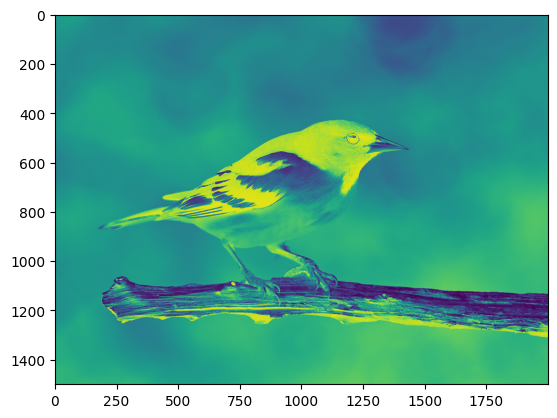

In [1]:
# tai hinh anh, chuyen sang grayscale
img = Image.open("bird.png").convert("L")
# chuyen doi sang numpy array
img1 = np.asanyarray(img)
# 
img2 = 255 - img1

# chuyen doi tu array ve lai hinh anh
new_img = Image.fromarray(img2)
img.show()

plt.imshow(new_img)
plt.show()

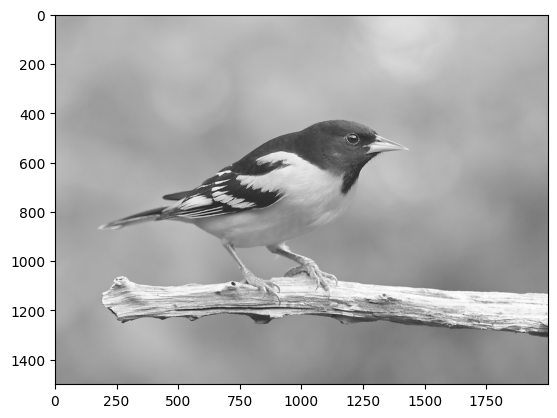

In [4]:
#1.2 gamma correction
# tai hinh anh, chuyen sang grayscale
img = Image.open("bird.png").convert("L")
# chuyen doi sang numpy array
img1 = np.asanyarray(img)

gamma = 0.5

#chuyen doi sang float de thuc hien phep toan
img1 = img1.astype(float)
 # tim gia tri toi da
max_value = np.max(img1)
#normalize
b3 = (img1+1 ) / max_value
# ap dung phep toan gamma
max_value = np.log(b3) * gamma
c = np.exp(max_value) * 255.0

convert = c.astype(np.uint8)


img_arr = Image.fromarray(convert)
img.show()
img_arr.show()
plt.imshow(img_arr, cmap='gray')
plt.show()

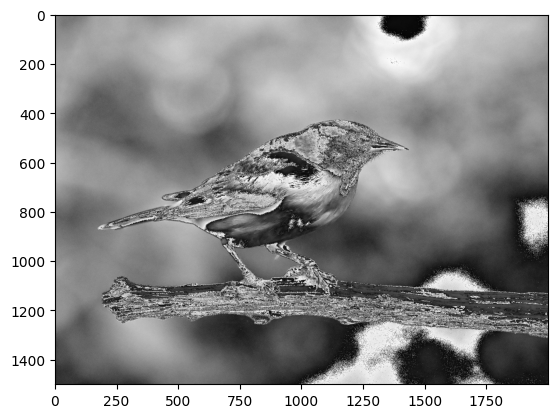

In [6]:
#1.3 log transformation
# tai hinh anh, chuyen sang grayscale
img = Image.open("bird.png").convert("L")
# chuyen doi sang numpy array
img1 = np.asanyarray(img)

gamma = 0.5

#chuyen doi sang float de thuc hien phep toan
img1 = img1.astype(float)
 # tim gia tri toi da
max_value = np.max(img1)
#normalize
b3 = (128*np.log(1+img1)) / np.log(1+max_value)
# ap dung phep toan gamma
max_value = np.log(b3+1) * gamma
c = np.exp(max_value) * 255.0

convert = c.astype(np.uint8)

img_arr = Image.fromarray(convert)
img.show()
img_arr.show()
plt.imshow(img_arr, cmap='gray')
plt.show()

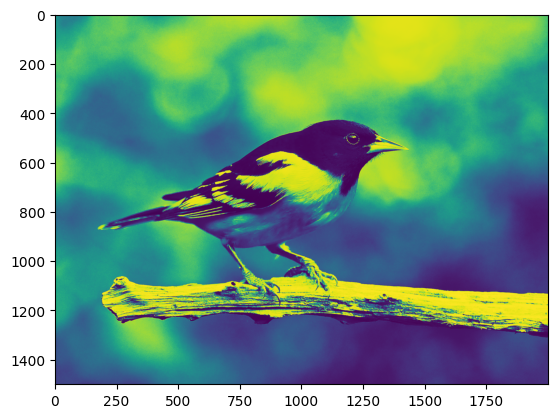

In [ ]:
#1.4 histogram equalization
#open a grayscale image
img = Image.open('bird.png') .convert('L') #convert image 1 into an ndarray
iml = np.asarray (img)
#convert 2D ndarray from 1D array 
b1 = iml.flatten()
#histogram and bin are computed
hist, bins = np.histogram (iml, 256, [0, 255])
#cumulative distribution function is computed
cdf =  hist.cumsum()
#places where cdf=0 is masked or ignored and # rest is stored in cdf_m
cdf_m= np.ma.masked_equal(cdf, 0)
#histogram equalization is performed
num_cdf_m = (cdf_m -cdf_m.min()) *255.0
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# the masked places in cdf_m are now 0
cdf =np.ma.filled (cdf_m, 0).astype('uint8') #cdf values are assigned in the flattened array 
im2 = cdf[b1]
#im2 is 1D so we use reshape command to
# make it into 2D
im3 = np.reshape (im2, iml.shape)
#converting im3 to an image
im4 = Image.fromarray (im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

0 255


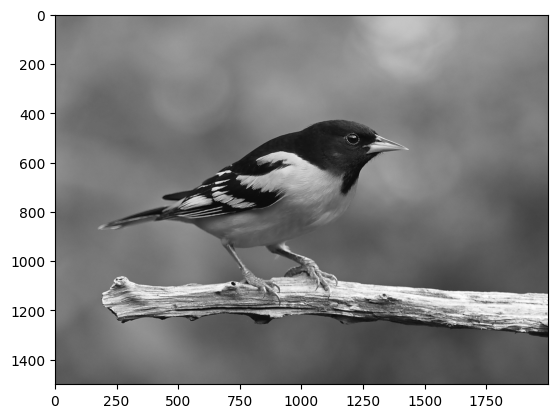

In [8]:
#1.5 Contrast stretching
#open a grayscale image
img = Image.open('bird.png').convert ('L')
#convert image 1 into an ndarray
iml = np.asarray (img)
# finding the maximum and minimum pixel values
b = iml.max()
a = iml.min()
print (a, b)
# converting iml to float
c = iml.astype (float)
# contrast stretching transformation
im2 = 255 * (c - a)/(b - a)
#im2 is converted from ndarray to image
im3 = Image. fromarray(im2)
#img.show()
#im3.show()
plt.imshow (im3)
plt.show()

[[2516.78007157 2261.37380907 1996.40468791 ... 1864.19825494
  1996.40468791 2261.37380907]
 [2093.95522123 1987.60938038 1860.06493834 ... 1775.25914133
  1892.17113656 2029.18378709]
 [1657.94380575 1656.49171712 1629.5320297  ... 1601.04304051
  1657.55194644 1675.73037845]
 ...
 [1477.03060955 1463.86165434 1451.97086687 ... 1422.33531776
  1450.3905195  1470.20993272]
 [1657.94380575 1675.73037845 1657.55194644 ... 1575.18072108
  1629.5320297  1656.49171712]
 [2093.95522123 2029.18378709 1892.17113656 ... 1760.09727437
  1860.06493834 1987.60938038]]


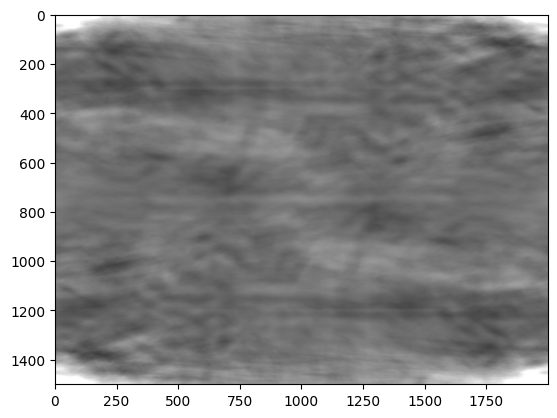

In [ ]:
#1.6.2 biến đổi Fourier dùng BLFF
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(iml))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0 #cut-off radius
n1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * n1

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        u1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(u1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**n1)
#H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
#print(e) test xem gia tri cua e
#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)
img.show()
im3.show()
plt.imshow(im3)
plt.show()


=== MENU BIEN DOI ANH ===
I. Image inverse transformation
G. Gamma-Correction
L. Log Transformation
H. Histogram equalization
C. Contrast Stretching
Q. Quit


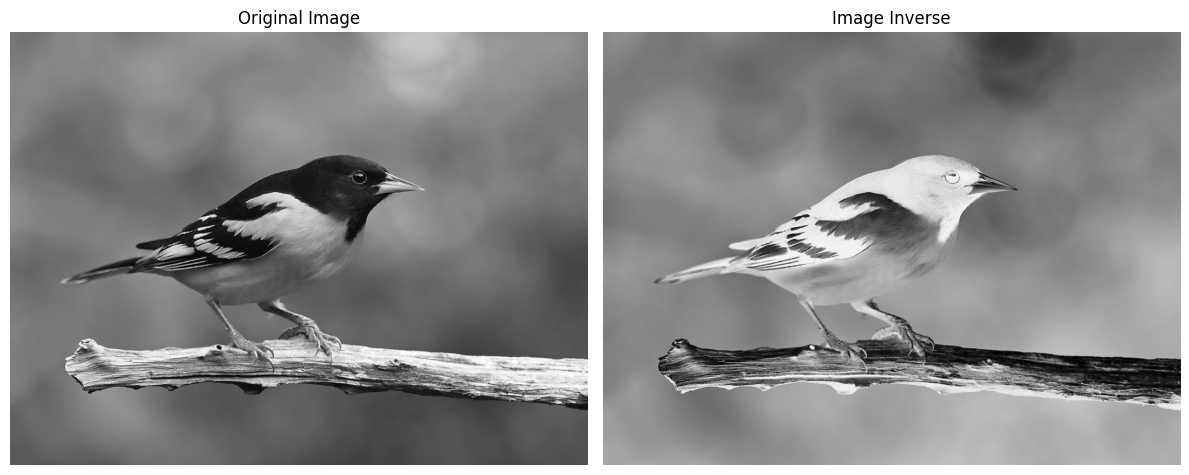


=== MENU BIEN DOI ANH ===
I. Image inverse transformation
G. Gamma-Correction
L. Log Transformation
H. Histogram equalization
C. Contrast Stretching
Q. Quit


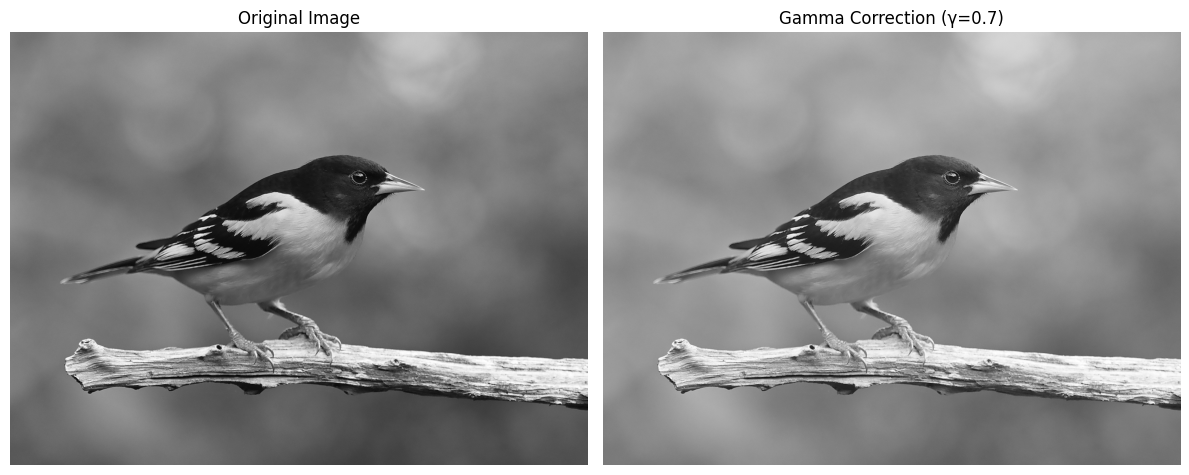


=== MENU BIEN DOI ANH ===
I. Image inverse transformation
G. Gamma-Correction
L. Log Transformation
H. Histogram equalization
C. Contrast Stretching
Q. Quit


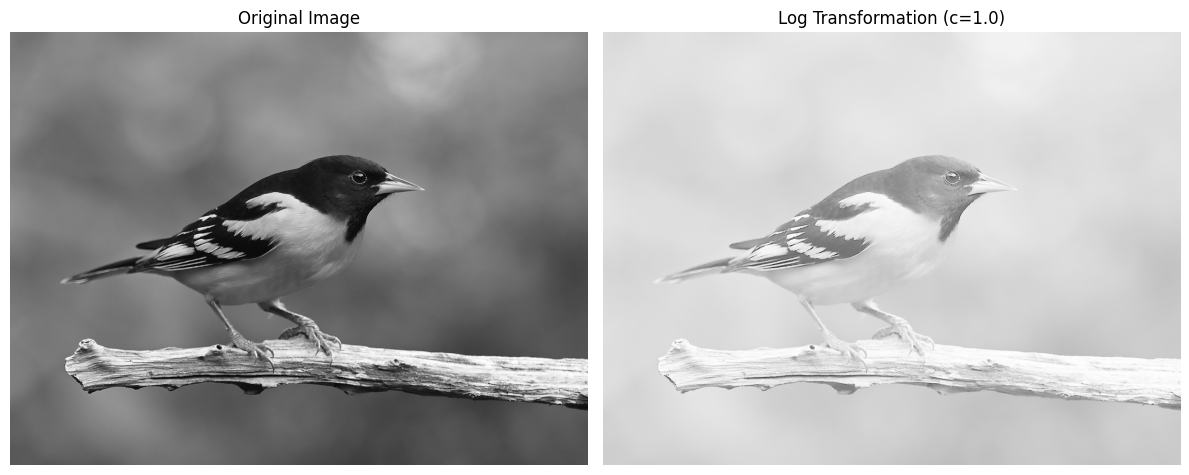


=== MENU BIEN DOI ANH ===
I. Image inverse transformation
G. Gamma-Correction
L. Log Transformation
H. Histogram equalization
C. Contrast Stretching
Q. Quit


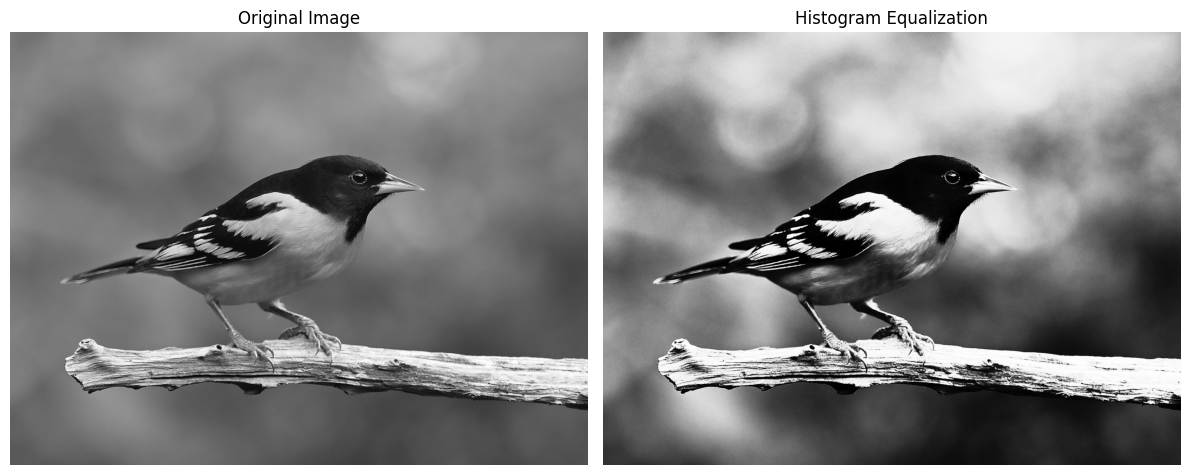


=== MENU BIEN DOI ANH ===
I. Image inverse transformation
G. Gamma-Correction
L. Log Transformation
H. Histogram equalization
C. Contrast Stretching
Q. Quit


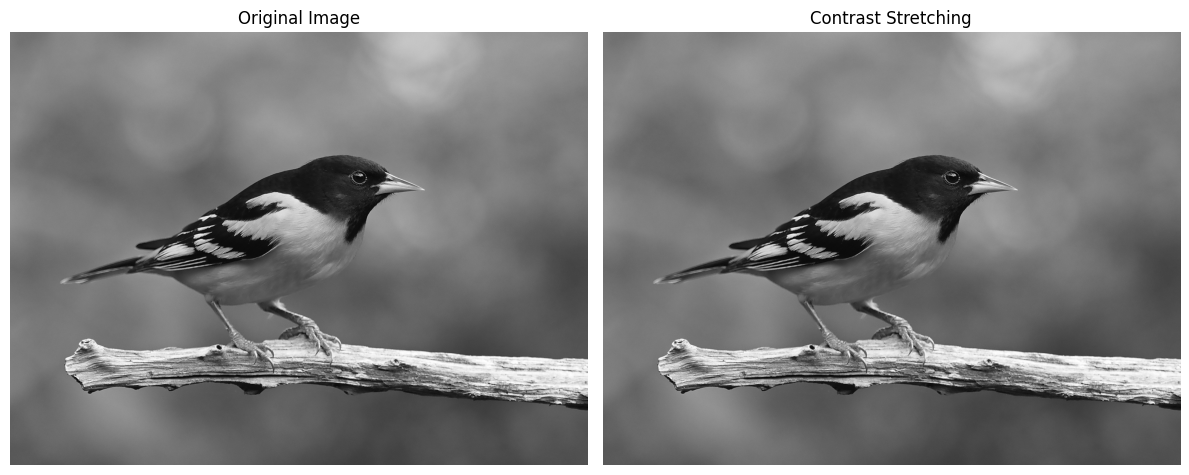


=== MENU BIEN DOI ANH ===
I. Image inverse transformation
G. Gamma-Correction
L. Log Transformation
H. Histogram equalization
C. Contrast Stretching
Q. Quit
Ket thuc chuong trinh!
Ket thuc chuong trinh!


In [ ]:
# bai tap 1
def image_transformations():
    # Load image once
    img = Image.open("bird.png").convert("L")
    img_array = np.asarray(img)
    
    while True:
        print("\n=== MENU BIEN DOI ANH ===")
        print("I. Image inverse transformation")
        print("G. Gamma-Correction") 
        print("L. Log Transformation")
        print("H. Histogram equalization")
        print("C. Contrast Stretching")
        print("Q. Quit")
        
        choice = input("Chon phuong phap (I/G/L/H/C/Q): ").upper()
        
        if choice == 'I':
            # Image inverse
            result = 255 - img_array
            show_results(img, Image.fromarray(result), "Image Inverse")
            
        elif choice == 'G':
            # Gamma correction
            gamma = float(input("Nhap gia tri gamma (0.1-3.0): ") or "0.5")
            normalized = img_array.astype(float) / 255.0
            result = np.power(normalized, gamma) * 255
            show_results(img, Image.fromarray(result.astype(np.uint8)), f"Gamma Correction (γ={gamma})")
            
        elif choice == 'L':
            # Log transformation
            c = float(input("Nhap hang so c (default=1): ") or "1")
            result = c * np.log(1 + img_array.astype(float))
            result = (result / np.max(result) * 255).astype(np.uint8)
            show_results(img, Image.fromarray(result), f"Log Transformation (c={c})")
            
        elif choice == 'H':
            # Histogram equalization
            hist, _ = np.histogram(img_array, 256, [0, 256])
            cdf = hist.cumsum()
            cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            result = cdf_normalized[img_array].astype(np.uint8)
            show_results(img, Image.fromarray(result), "Histogram Equalization")
            
        elif choice == 'C':
            # Contrast stretching
            r_min, r_max = np.min(img_array), np.max(img_array)
            result = ((img_array - r_min) * 255.0 / (r_max - r_min)).astype(np.uint8)
            show_results(img, Image.fromarray(result), "Contrast Stretching")
            
        elif choice == 'Q':
            print("Ket thuc chuong trinh!")
            break
        else:
            print("Lua chon khong hop le!")

def show_results(original, transformed, title):
    # Display images side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(transformed, cmap='gray') 
    ax2.set_title(title)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

# Run the program
image_transformations()